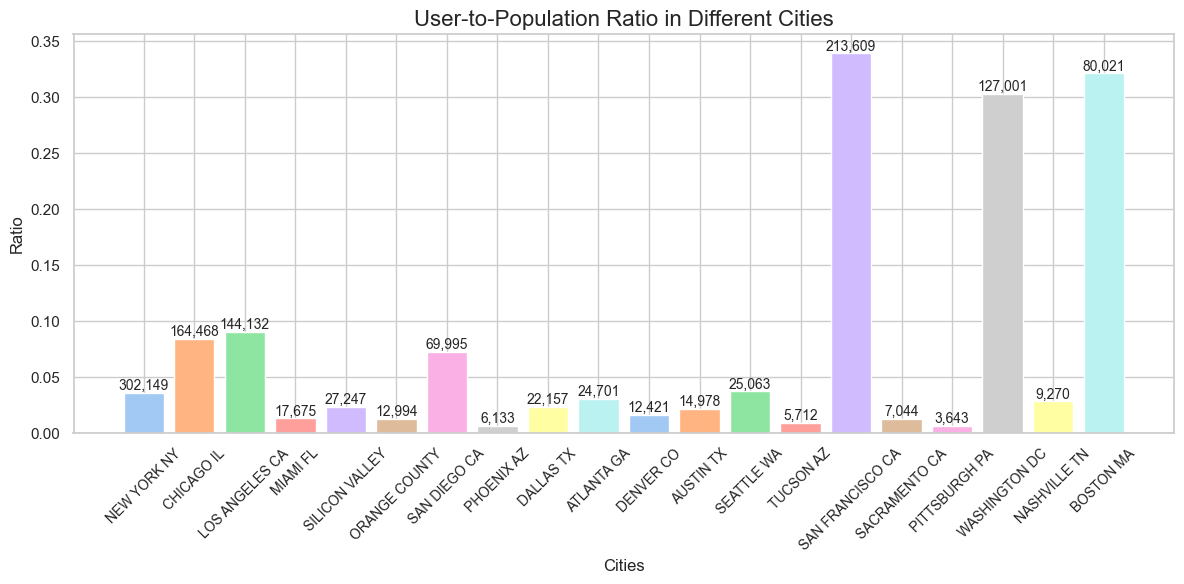

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load city data from a CSV file
data = pd.read_csv("City.csv")

# Check and clean up any duplicate records
data.drop_duplicates(inplace=True)

# Extract city names, population, and user data
cities = data["City"]

# Convert population and user counts, handle any errors
population = pd.to_numeric(data["Population"].str.replace(',', ''), errors='coerce')
users = pd.to_numeric(data["Users"].str.replace(',', ''), errors='coerce')

# Check for missing or invalid data
if population.isnull().any() or users.isnull().any():
    print("Warning: Some data in 'Population' or 'Users' columns is missing or invalid.")

# Calculate the user-to-population ratio, making sure we don't divide by zero
user_population_ratio = users / population.replace(0, 1)

# Set up the Seaborn style
sns.set(style="whitegrid")

# Define colors for the bars
colors = sns.color_palette("pastel", n_colors=len(cities))

# Create a bar graph to show user-to-population ratio with custom colors
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
bars = plt.bar(cities, user_population_ratio, label="User-to-Population Ratio", color=colors)

# Add labels and title
plt.xlabel("Cities", fontsize=12)
plt.ylabel("Ratio", fontsize=12)
plt.title("User-to-Population Ratio in Different Cities", fontsize=16)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, fontsize=10)

# Add user counts with commas on each bar
for bar, user_count in zip(bars, users):
    formatted_user_count = "{:,}".format(user_count)  # Format the number with commas
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), formatted_user_count,
             ha='center', va='bottom', fontsize=10)

# Adjust the layout for better spacing
plt.tight_layout()

# Show the graph
plt.show()
